In [1]:
import os,glob
import numpy as np
import scipy.io
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import torchvision.transforms.functional as TF

import matplotlib.pyplot as plt

import models

# Define rotations to rotate image 
rotations = [0, 45, 90, 135, 180, 225, 270, 315]
# rotations = [0,90]
num_rot = len(rotations)
digits = [4,9]
# Define transformation to convert image to tensor
transform = transforms.ToTensor()

# Load MNIST train and test datasets
trainset = datasets.MNIST('data', train=True, download=True, transform=transform)
testset = datasets.MNIST('data', train=False, download=True, transform=transform)

# Define filter function to only include images of digits 5 and 6
def filter_dataset(dataset):
    filtered_data = []
    for i in range(len(dataset)):
        image, label = dataset[i]
        if label == digits[0] or label == digits[1]:
            label = 0 if label==digits[0] else 1
            for angle in rotations:
                rotated_img = TF.rotate(image, angle)#torch.rot90(image, angle // 45)
                filtered_data.append((rotated_img.flatten(), label, angle))
                
    return filtered_data

# Filter train and test datasets to only include images of digits 5 and 6
trainset_filtered = filter_dataset(trainset)
testset_filtered = filter_dataset(testset)

# Define dataloaders for train and test datasets
train_dataloader = torch.utils.data.DataLoader(trainset_filtered, batch_size=32, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(testset_filtered, batch_size=32, shuffle=True)

#data dimensions
input_dim = trainset_filtered[0][0].shape[0]
output_dim = 1 


ML_model_name = "fc_stg_layered_param_modular_model"#"fc_stg_layered_param_linear_model"#"fc_stg_layered_param_model"#"fc_stg_param_model"

# learning_rate = 1e-3
# stg_regularizer = 1e-2 #1e-2
# hidden_dims = [128,64]
# hyper_hidden_dim = [64,128]

epochs = 10
param_dim = 8
dropout = 0


for hyper_hidden_dim in [[500],[1000],[64,128],[]]:
    for stg_regularizer in [1e-2,5e-3,1e-3,5e-4,1e-4,5e-5,1e-5]:
        for hidden_dims in [[],[128,64],[1000]]:
            for learning_rate in [1e-2,5e-3,1e-3,5e-4,1e-4,5e-5,1e-5]:

                add_name = ""
                add_name += "_"+"_".join(np.array([input_dim]+hidden_dims+[output_dim]).astype(str))
                add_name += "_hyper_"+"_".join(np.array([param_dim]+hyper_hidden_dim+[input_dim]).astype(str))
                
                root_fname = "/data2/rsristi/FeatureSelection/Trained_Model_mnist/Trained_Model_mnist" #"./Trained_Model_mnist" #/data2/rsristi/FeatureSelection
                if not os.path.exists(root_fname):
                    os.mkdir(root_fname)
                    
                model_path = "{}/{}_{}_{}_lr_{}_stg_lr_{}{}.model".format(root_fname,ML_model_name,digits[0],digits[1],str(learning_rate).replace(".", "_"),str(stg_regularizer).replace(".","_"),add_name)

                loss_path = model_path.replace("model","mat")
                plots_folder = model_path.replace(".model","")
                if not os.path.exists(plots_folder):
                    os.mkdir(plots_folder)
                
#                 print(model_path.replace(root_fname,""))
#                 if os.path.exists(model_path):
#                     print("Already Exists")
#                     continue
                    
#                 print("Doesn't Exist")

In [6]:
model_path

'/data2/rsristi/FeatureSelection/Trained_Model_mnist/fc_stg_layered_param_modular_model_4_9_lr_1e-05_stg_lr_1e-05_784_1000_1_hyper_8_784.model'

True
True
True
True
True
True
True


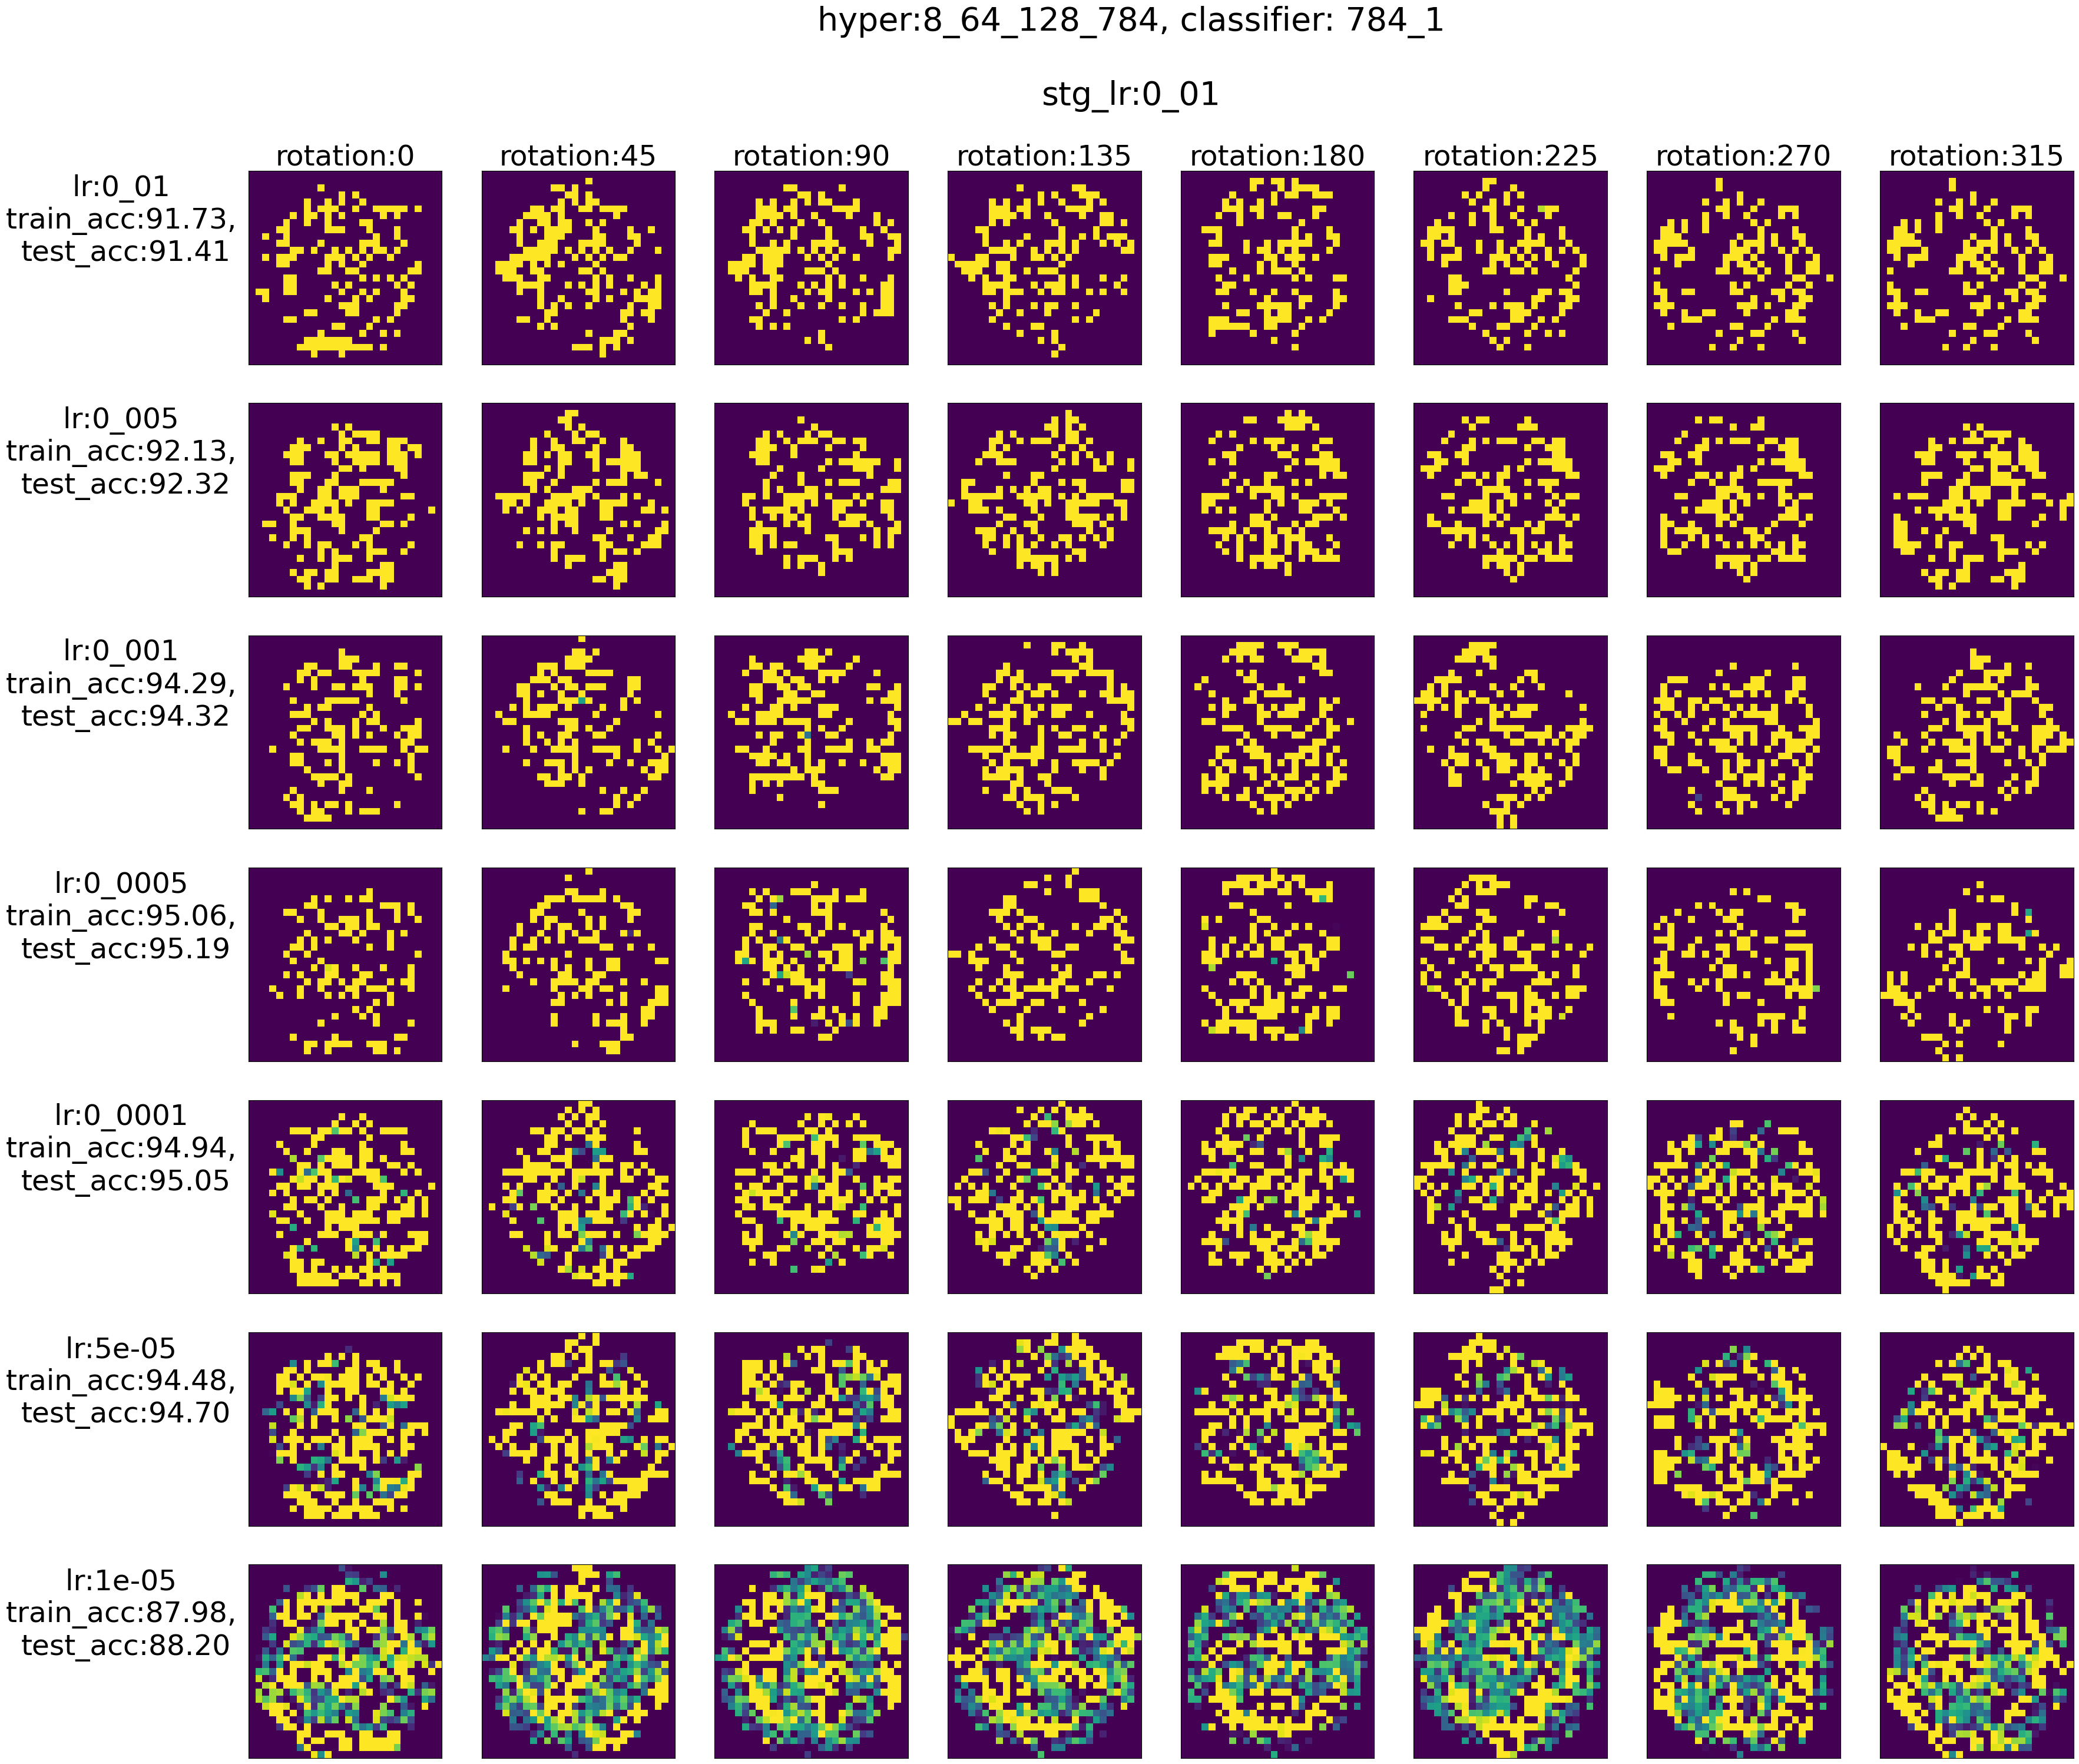

True
True
True
True
True
True
True


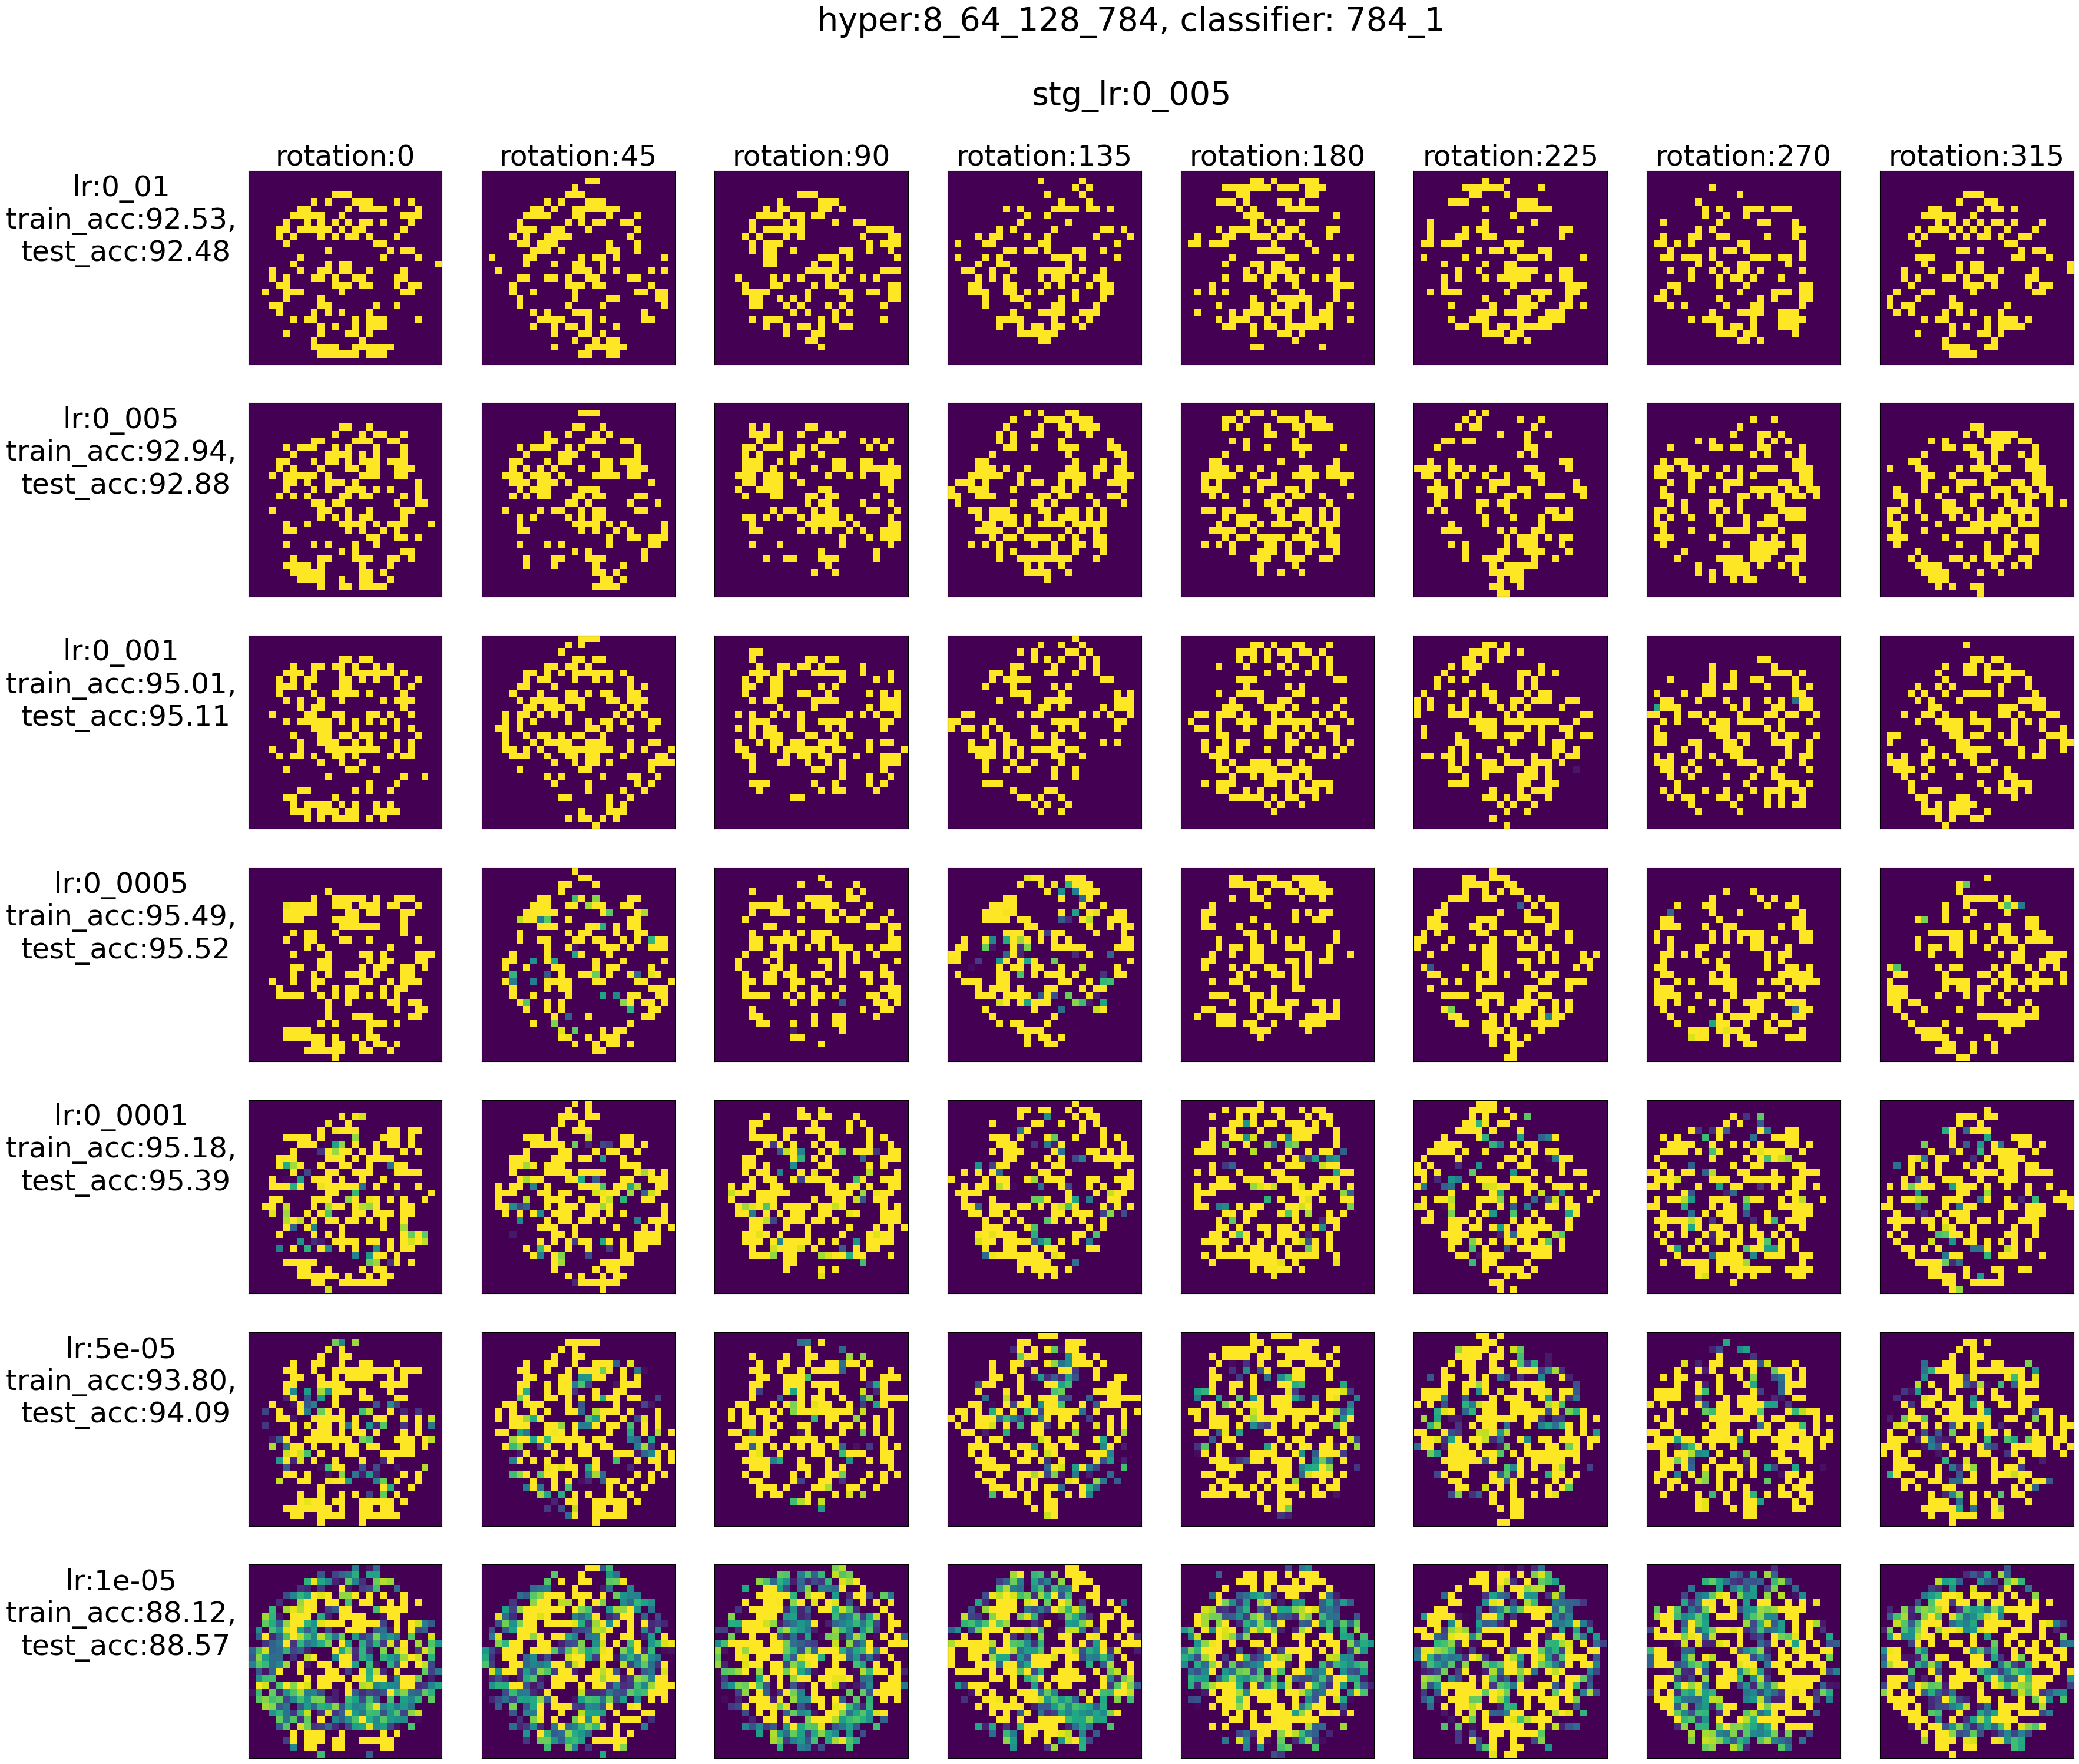

True
True
True
True
True
True
True


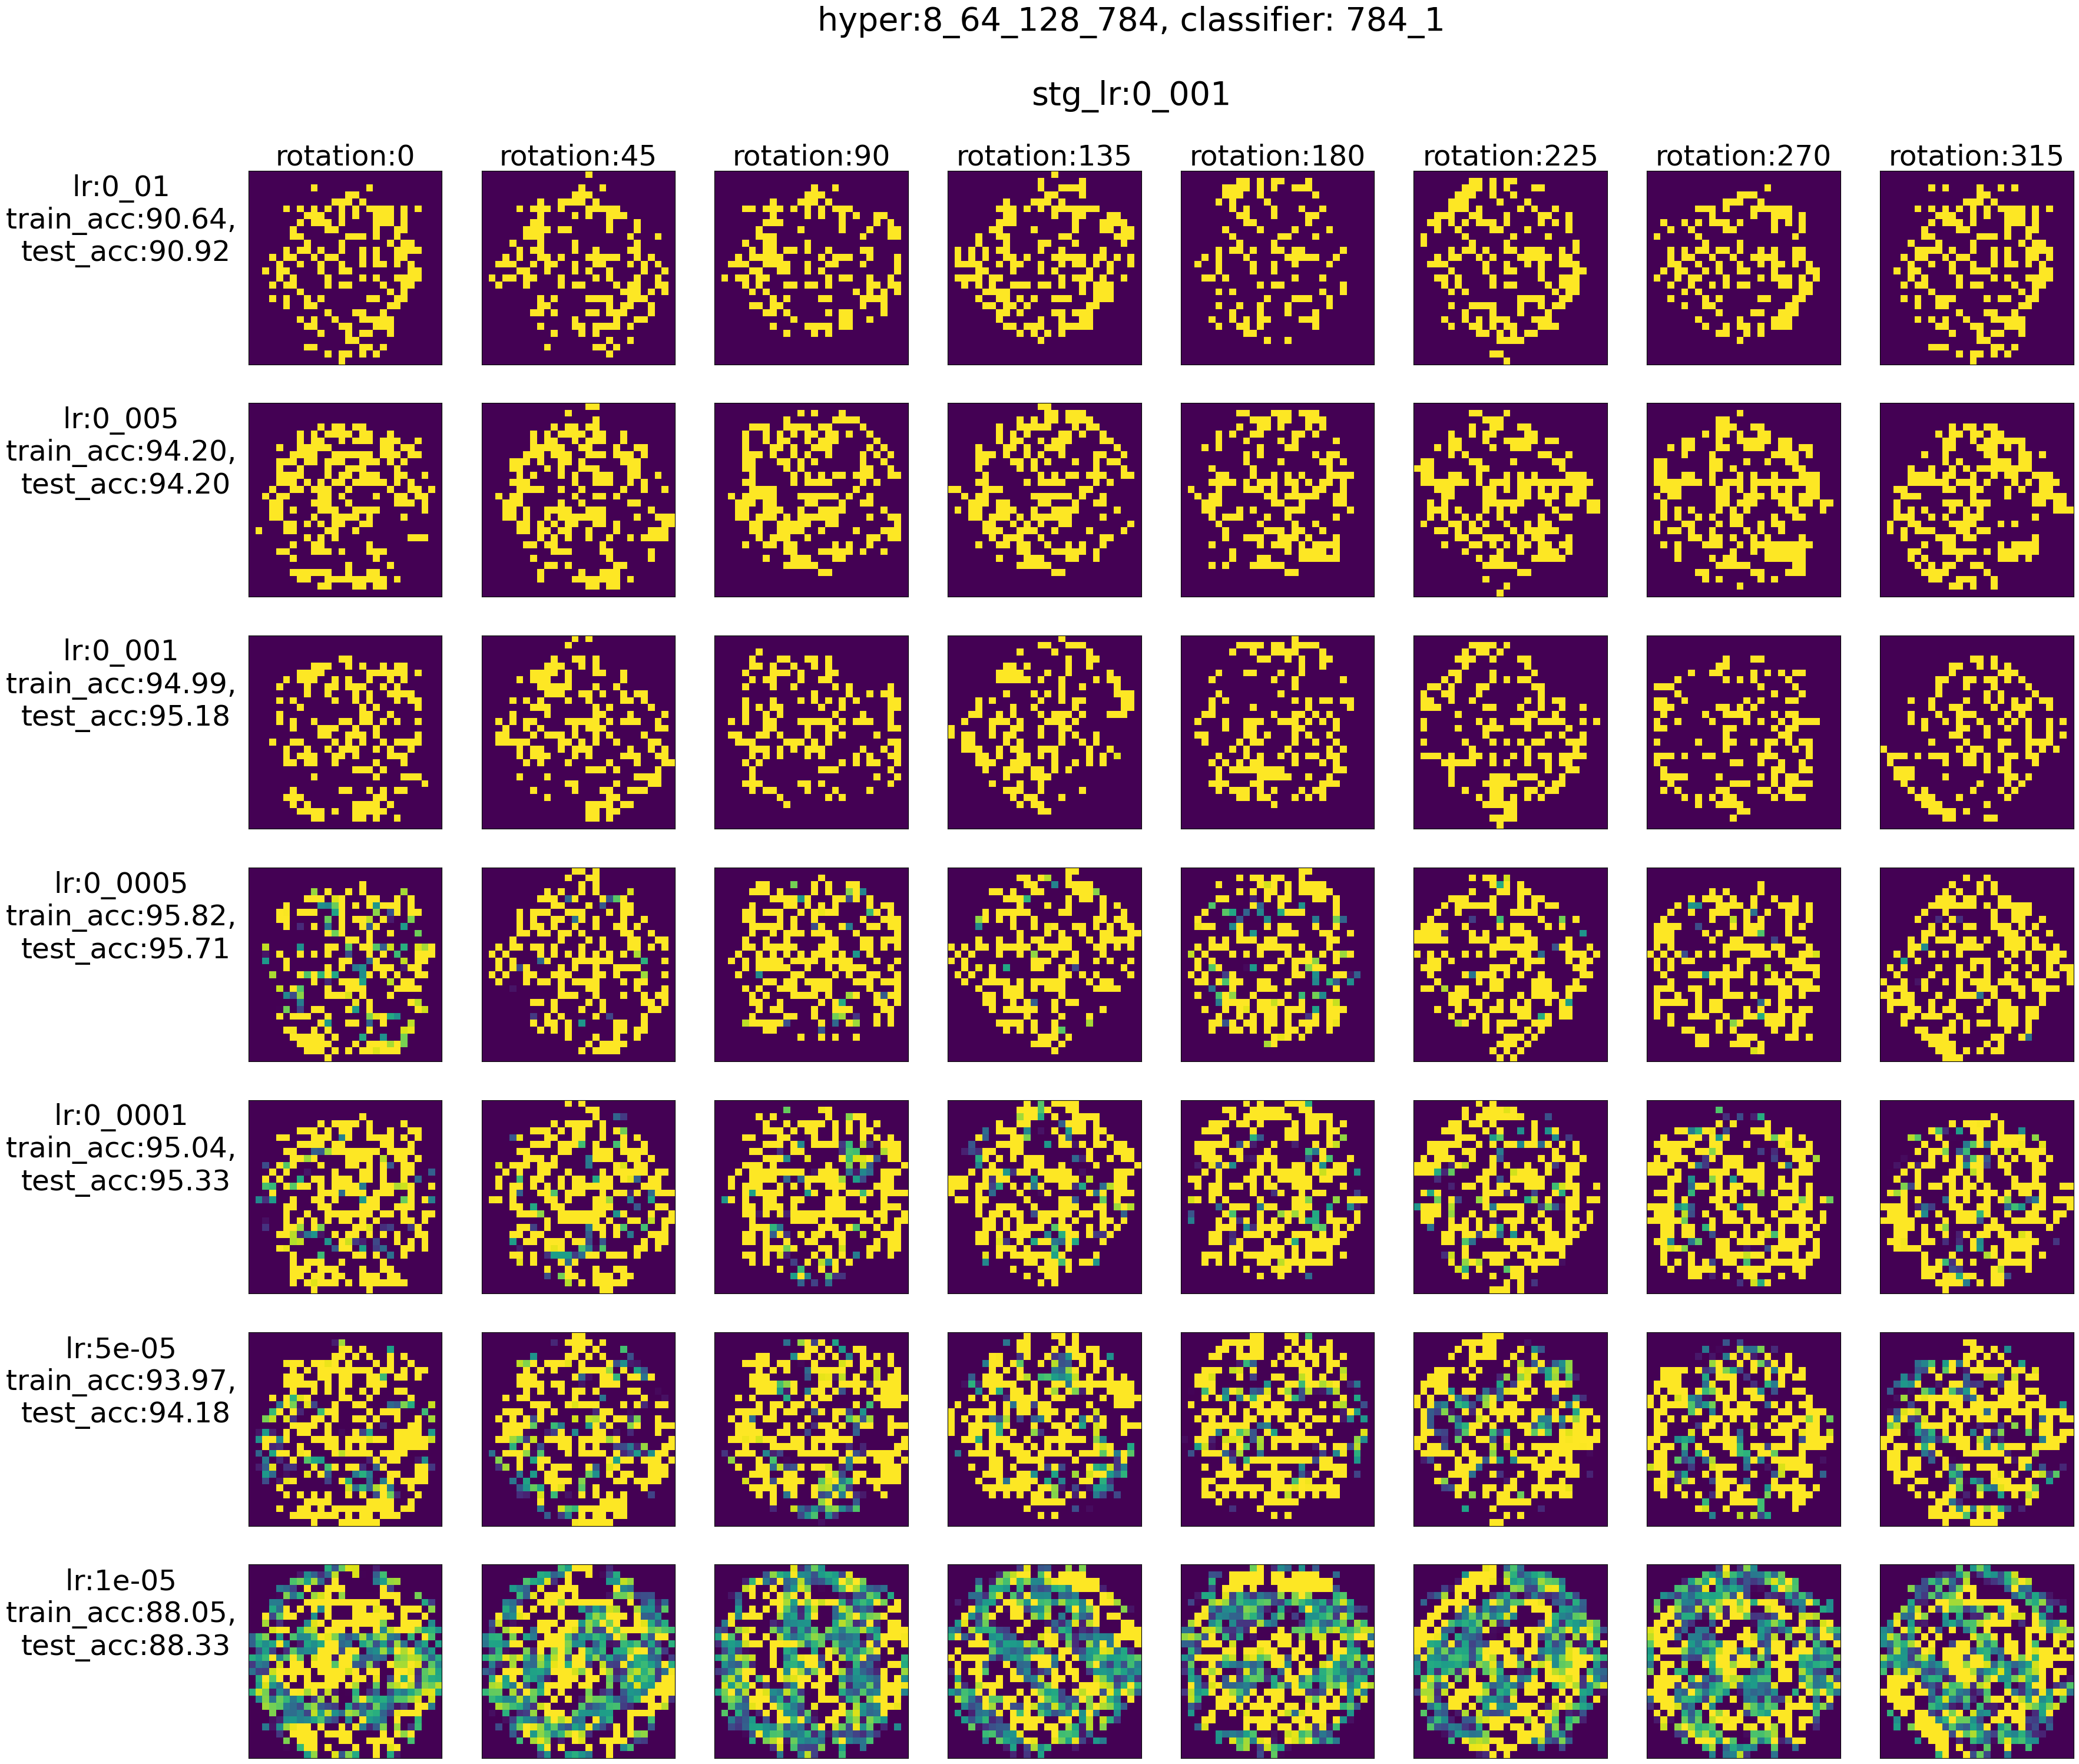

True
True
True
True
True
True
True


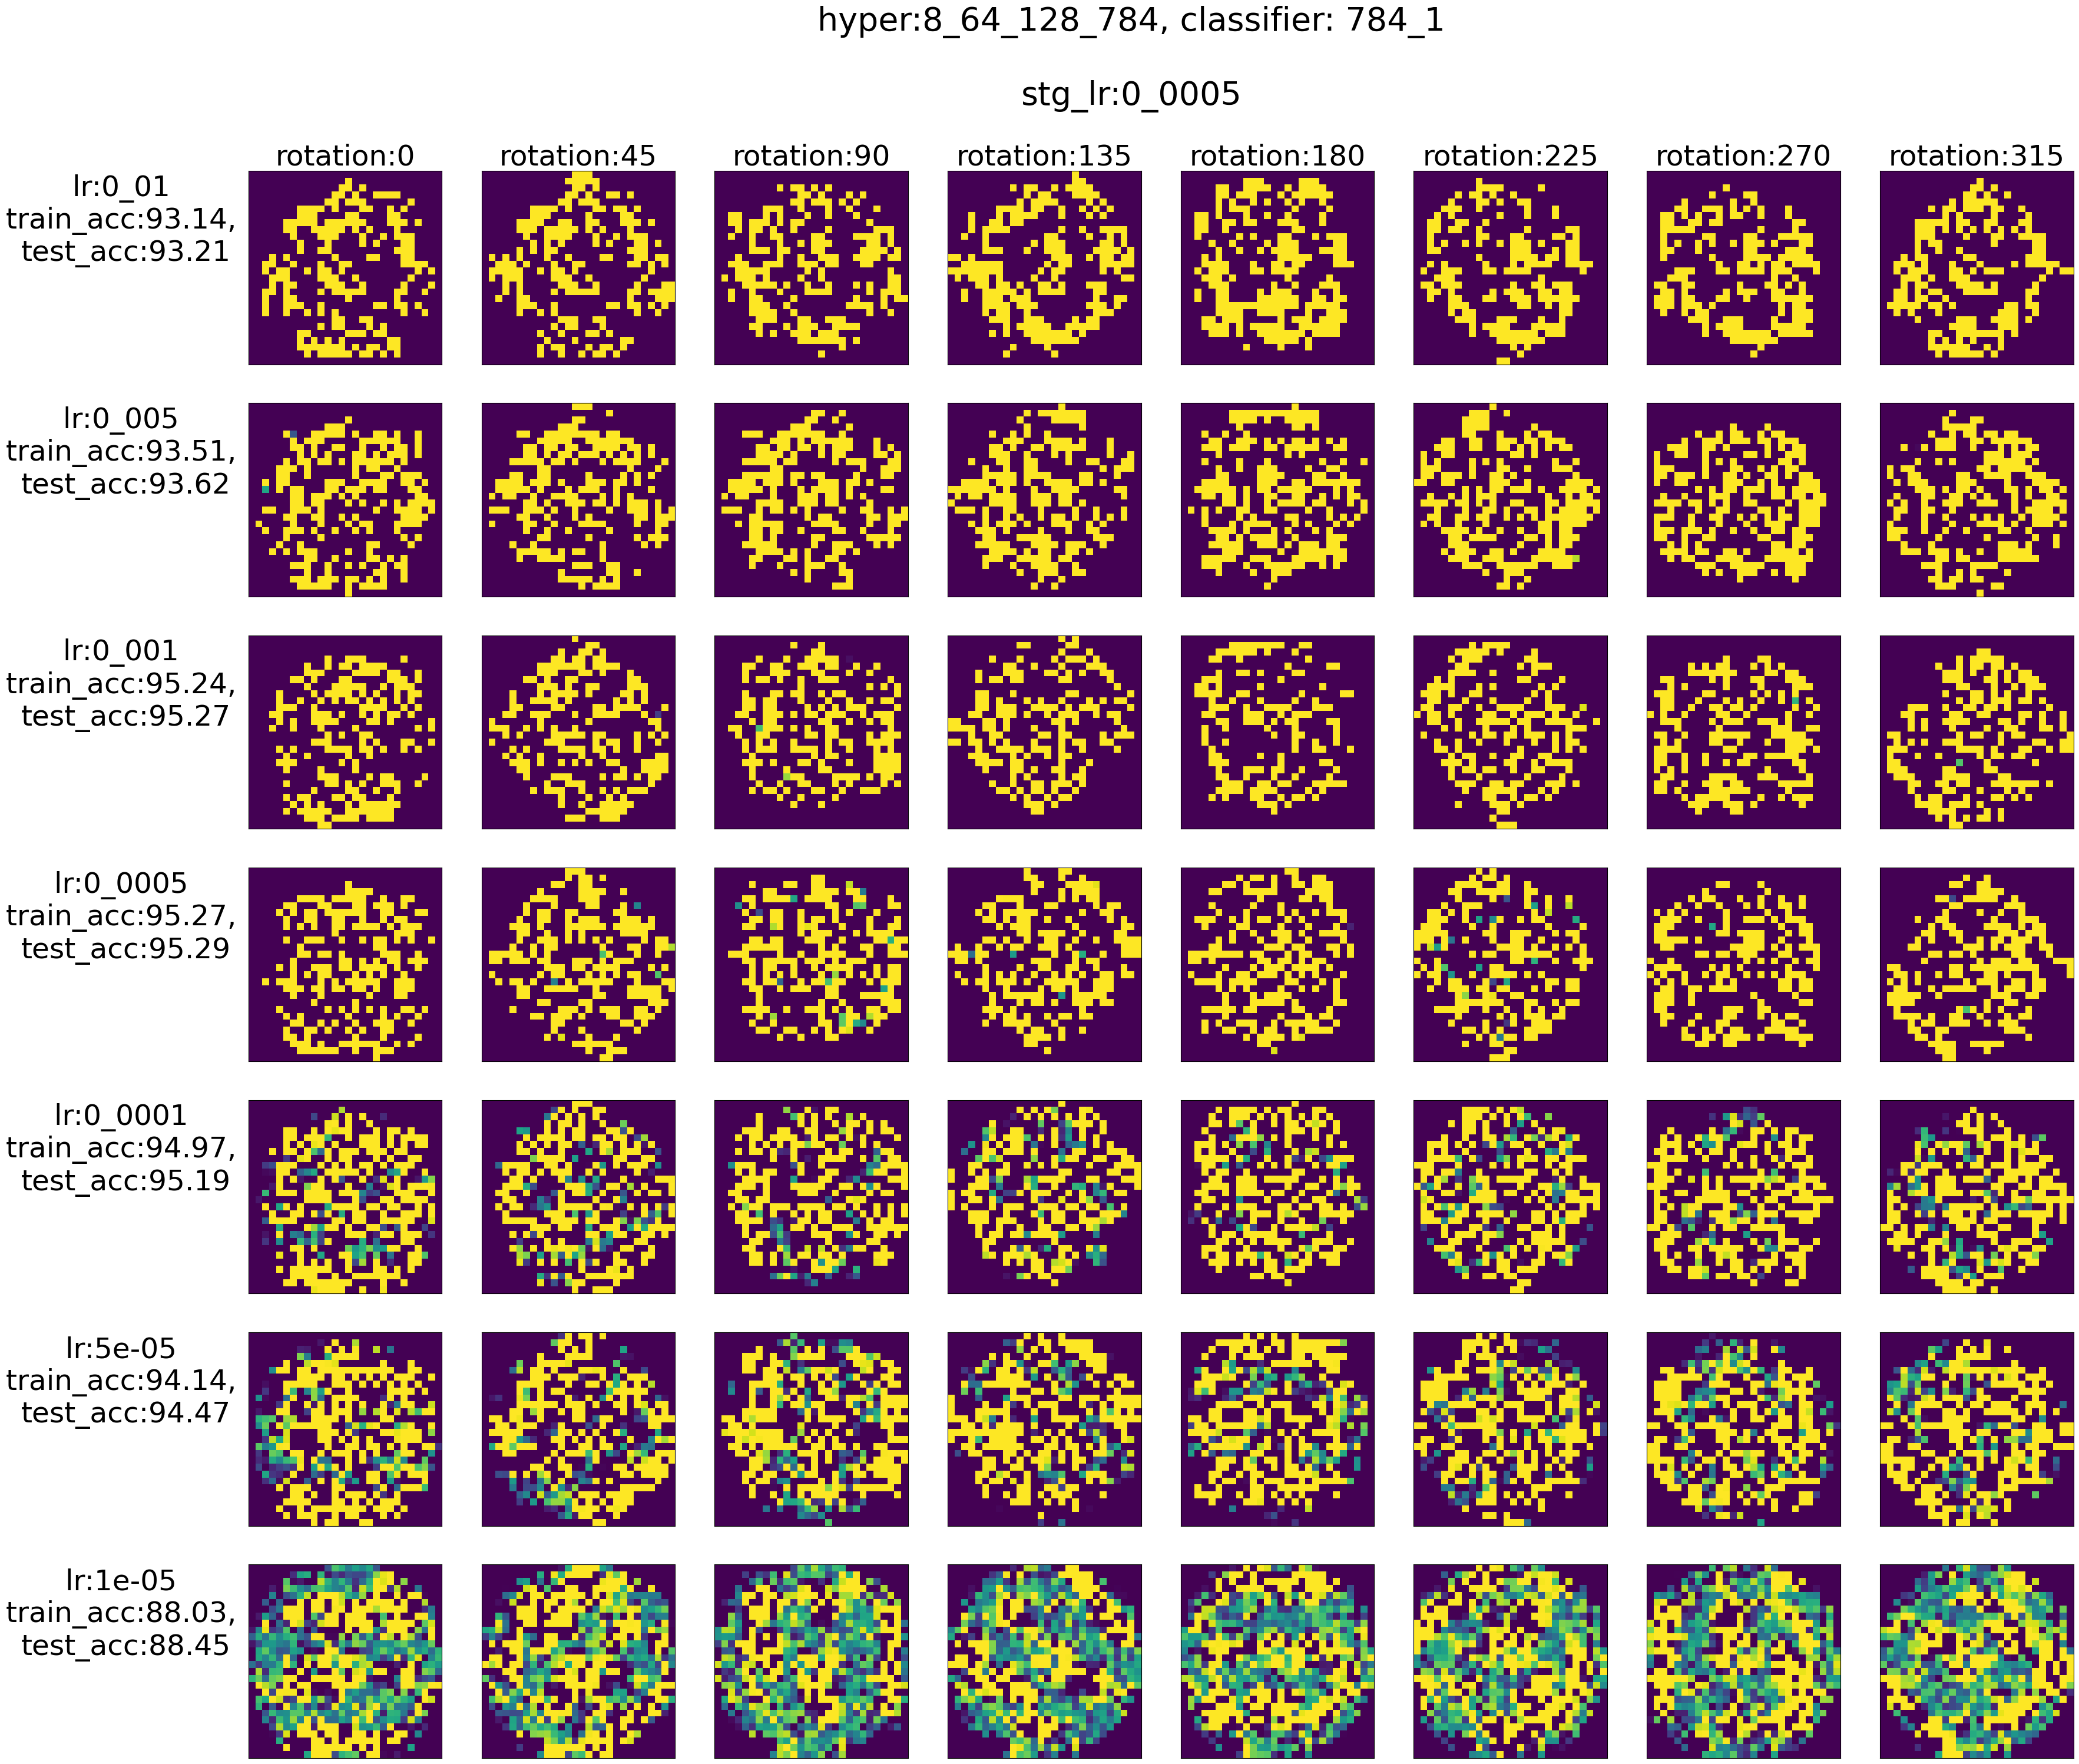

True
True
True
True
True
True
True


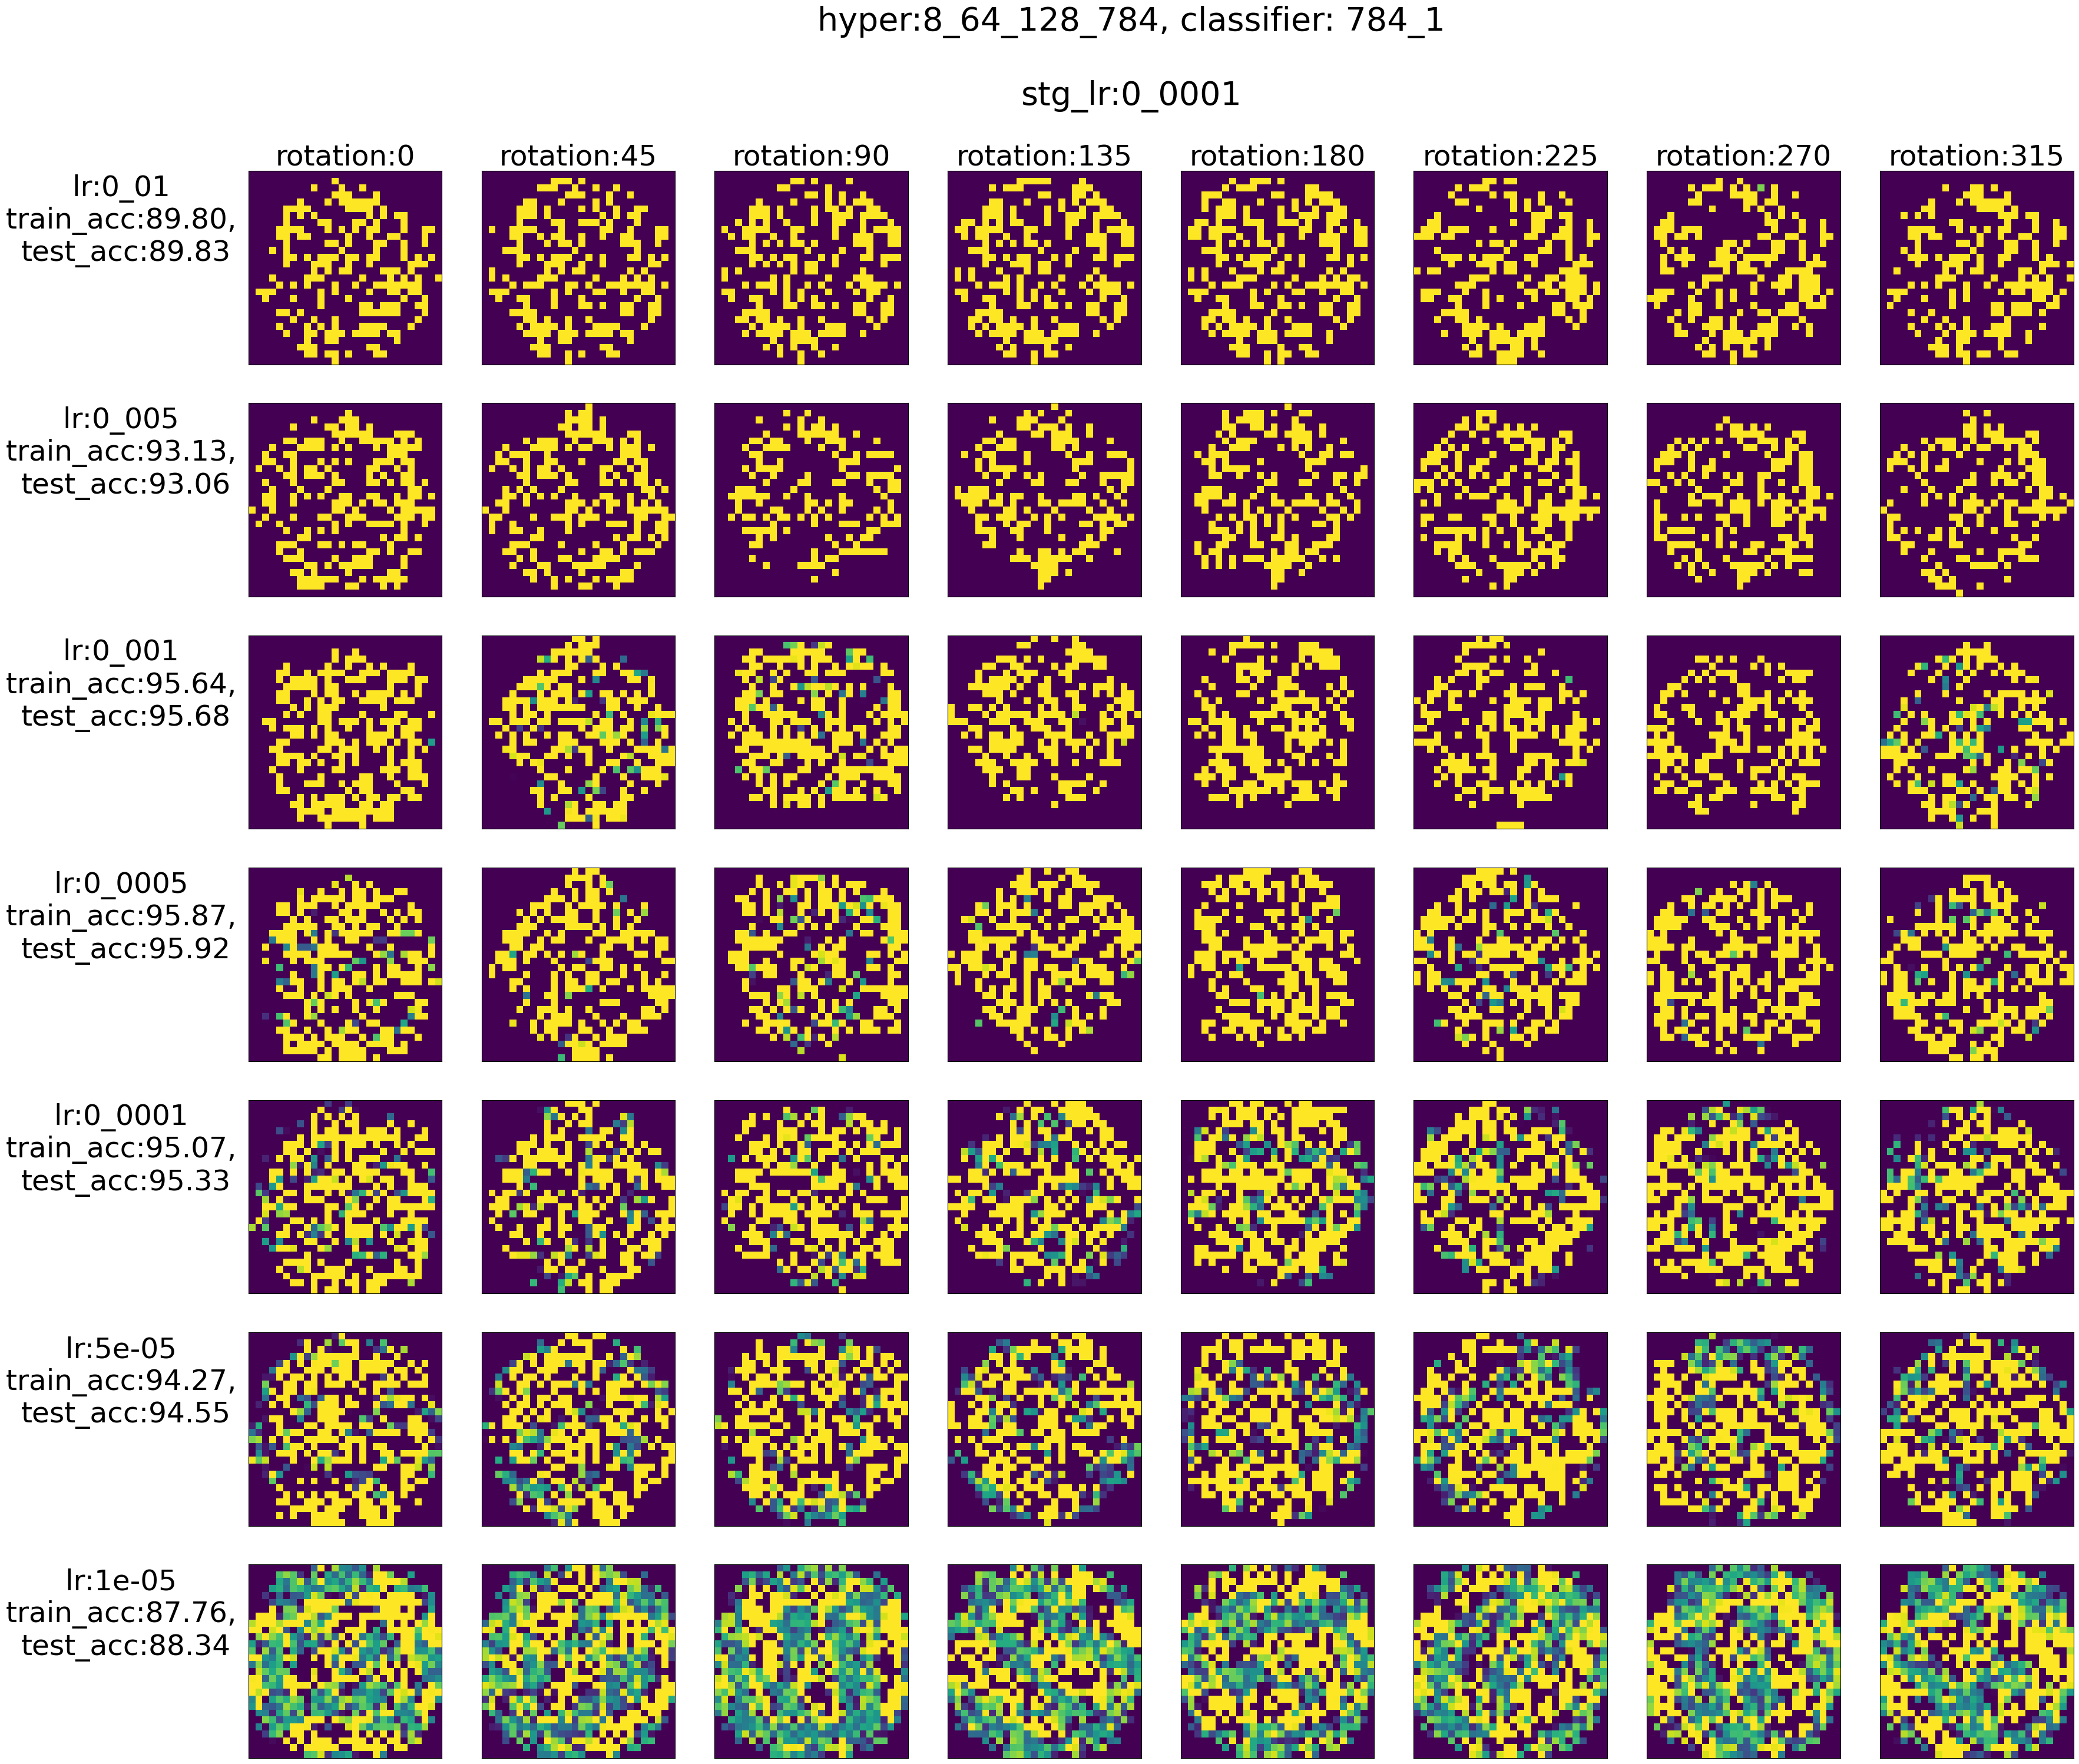

True
True
True
True
True
True
True


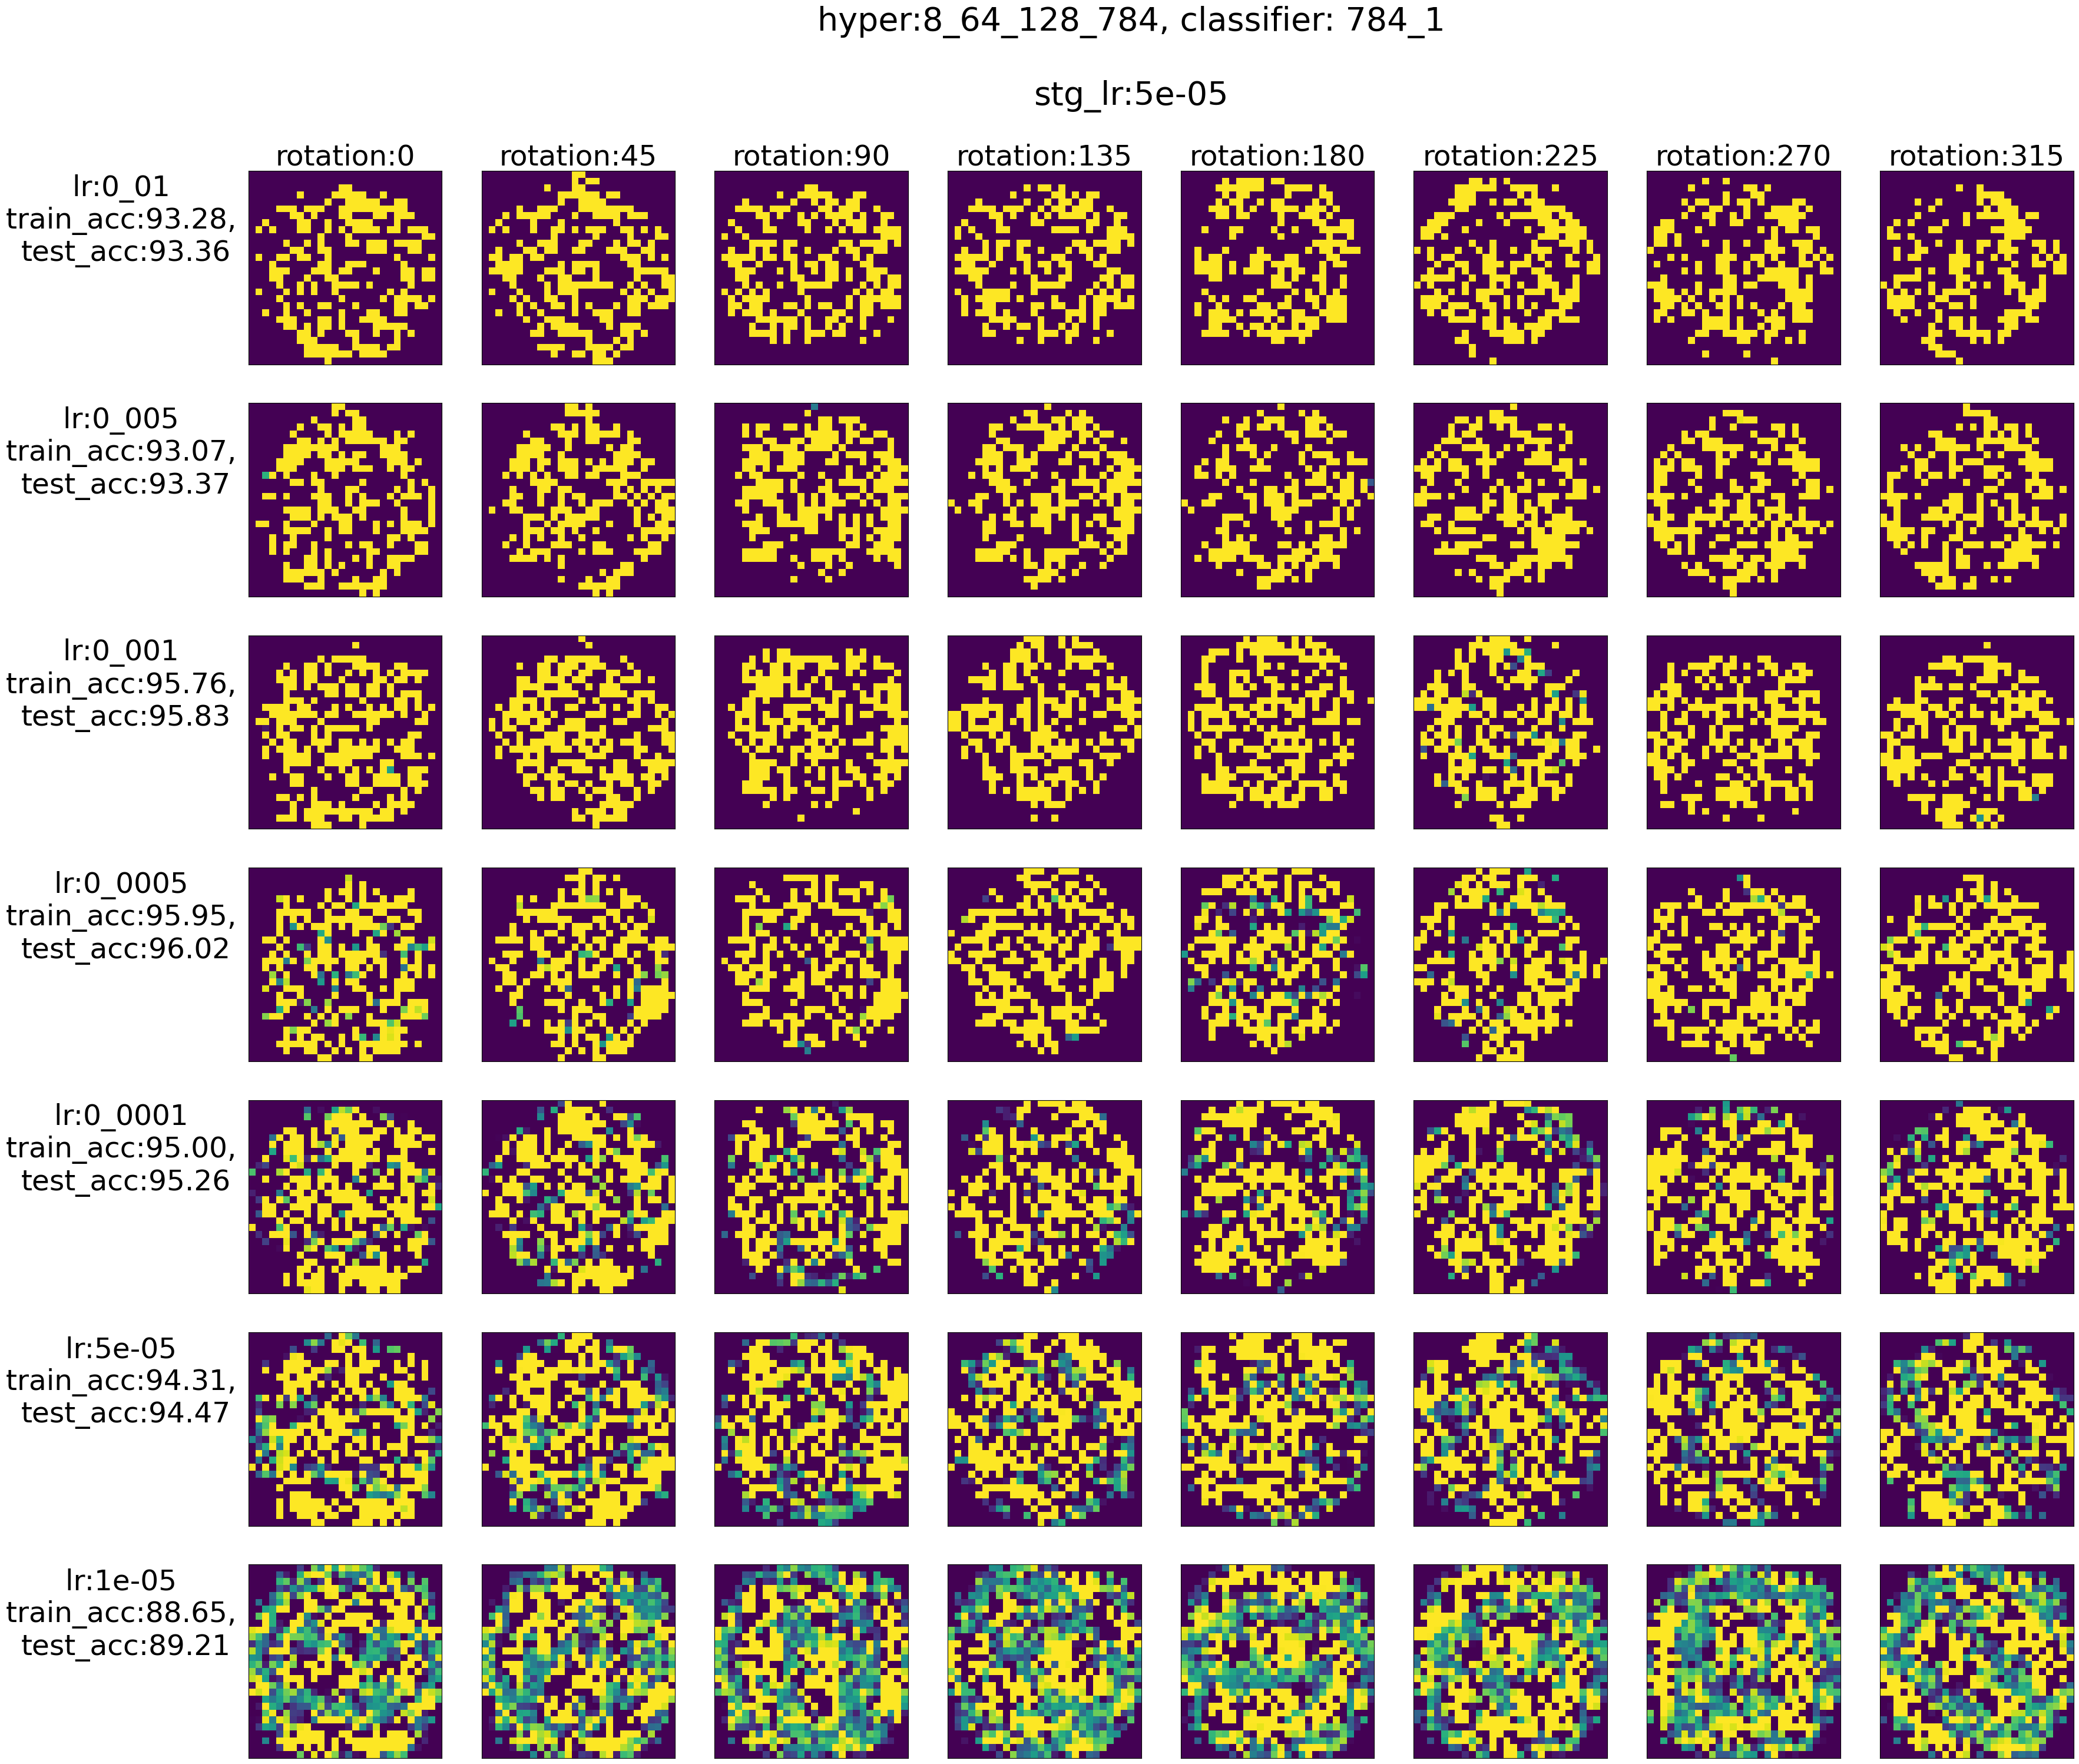

True
True
True
True
True
True
True


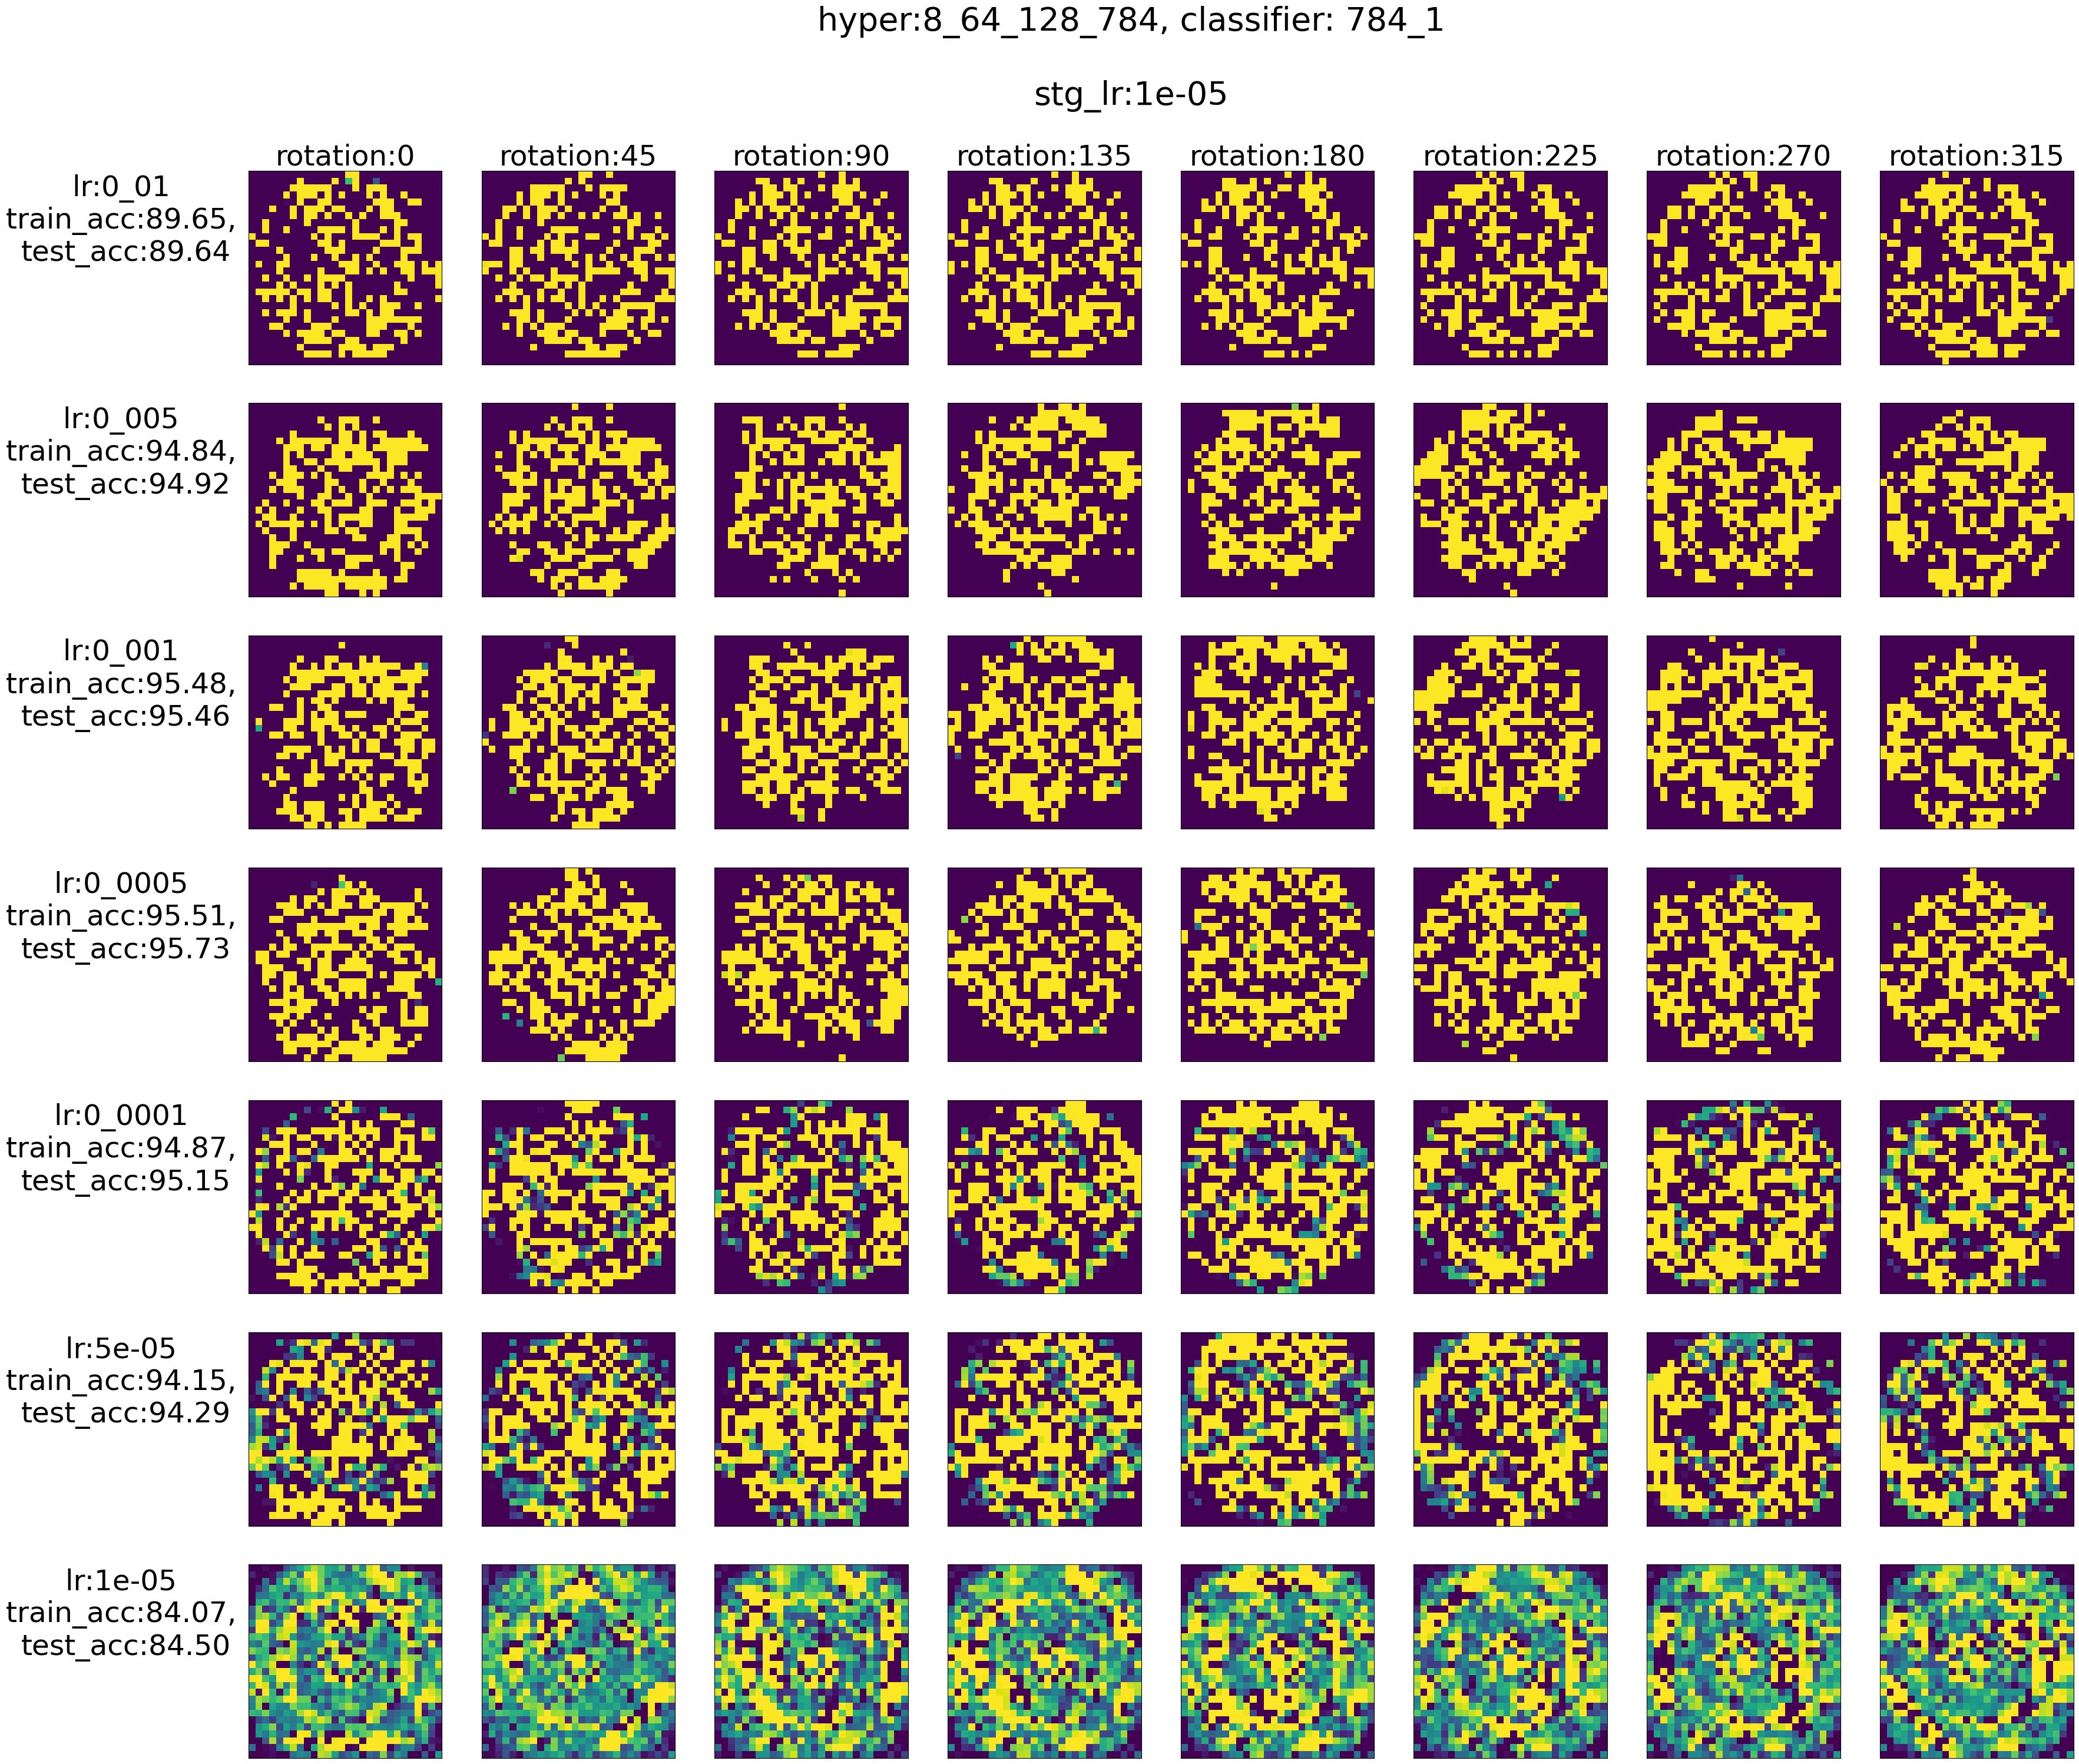

In [3]:
import glob,os
import numpy as np
# root_fname = "/data2/rsristi/FeatureSelection/Trained_Model_mnist/Trained_Model_mnist" #"./Trained_Model_mnist" #/data2/rsristi/FeatureSelection                
# for fname in glob.glob(root_fname+"/*.mat"):
#     print(fname.replace(root_fname+"/fc_stg_layered_param_modular_mat_4_9_",""))
gpu = torch.device('cuda:0')

count = 0
for hyper_hidden_dim in [[64,128]]:
    for hidden_dims in [[]]:
        for stg_regularizer in [1e-2,5e-3,1e-3,5e-4,1e-4,5e-5,1e-5]: #1e-1,5e-2,
        
#             if count!=0:
#                 continue
#             count += 1
            fig,ax = plt.subplots(7,8,figsize=(5*num_rot,5*7))
            
            for lr_idx,learning_rate in enumerate([1e-2,5e-3,1e-3,5e-4,1e-4,5e-5,1e-5]):
                
#                 
                
                add_name = ""
                add_name += "_"+"_".join(np.array([input_dim]+hidden_dims+[output_dim]).astype(str))
                add_name += "_hyper_"+"_".join(np.array([param_dim]+hyper_hidden_dim+[input_dim]).astype(str))
#                 print(add_name,input_dim,hidden_dims,output_dim,param_dim,hyper_hidden_dim)
                
                root_fname = "/data2/rsristi/FeatureSelection/Trained_Model_mnist/Trained_Model_mnist" #"./Trained_Model_mnist" #/data2/rsristi/FeatureSelection
                if not os.path.exists(root_fname):
                    os.mkdir(root_fname)
                    
#                 model_path = "{}/{}_{}_{}_lr_{}_stg_lr_{}{}.model".format(root_fname,ML_model_name,digits[0],digits[1],str(learning_rate).replace(".", "_"),str(stg_regularizer).replace(".","_"),add_name)
                model_path = "{}/{}_{}_{}_lr_{}_stg_lr_{}{}.model".format(root_fname,ML_model_name,digits[0],digits[1],str(learning_rate).replace(".", "_"),str(stg_regularizer).replace(".","_"),add_name)
                loss_path = model_path.replace("model","mat")
                plots_folder = model_path.replace(".model","")
                if not os.path.exists(plots_folder):
                    os.mkdir(plots_folder)
                
                
                if not os.path.exists(model_path):
                    print(model_path.replace(root_fname,""))
                    print("Doeesn't Exist")
                    continue
                    
                model = models.__dict__[ML_model_name](input_dim, hidden_dims, output_dim, param_dim, hyper_hidden_dim, dropout)
                model = model.to(gpu).float()
#                 print(model)
                model.load_state_dict(torch.load(model_path))
                model.eval()
                
                mat_content = scipy.io.loadmat(loss_path)
                mat_content.keys()
#                 train_loss_array = np.squeeze(mat_content['train_loss_array'], axis=0).tolist()[1:]
#                 test_loss_array = np.squeeze(mat_content['test_loss_array'], axis=0).tolist()[1:]
                train_acc_array = np.squeeze(mat_content['train_acc'], axis=0).tolist()[1:]
                test_acc_array = np.squeeze(mat_content['test_acc'], axis=0).tolist()[1:]
                train_acc = np.max(train_acc_array)
                test_acc = np.max(test_acc_array)
                    
                B = torch.tensor(rotations).to(gpu).int()/rotations[1]
                B = F.one_hot((B).to(int),num_classes=num_rot).float()

                mu = model.gates.get_feature_importance(B)
                mu = mu.detach().cpu().numpy()

                
                for rotation_idx in range(len(rotations)):
#                     plt.subplot(lr_idx,num_rot,rotation_idx+1)
                    ax[lr_idx,rotation_idx].imshow(mu[rotation_idx].reshape(28,28))
                    if lr_idx==0:
                        ax[lr_idx,rotation_idx].set_title("rotation:{}".format(rotations[rotation_idx]),fontsize=35,)
                    ax[lr_idx,rotation_idx].set_xticks([])
                    ax[lr_idx,rotation_idx].set_yticks([])
                    if rotation_idx==0:
                        ax[lr_idx,rotation_idx].set_ylabel("\nlr:{} \ntrain_acc:{:.2f}, \ntest_acc:{:.2f}".format(str(learning_rate).replace(".", "_"),train_acc,test_acc),fontsize=35,rotation=0, labelpad=150)
#                 plt.figure(figsize=(5*num_rot,5))
#                 for rotation_idx in range(len(rotations)):
#                     plt.subplot(lr_idx,num_rot,rotation_idx+1)
#                     plt.imshow(mu[rotation_idx].reshape(28,28))
#                     plt.title("rotation:{}".format(rotations[rotation_idx]),fontsize=35)
#                     plt.xticks([])
#                     plt.yticks([])
                title_add_name = ""
                title_add_name += "hyper:"+"_".join(np.array([param_dim]+hyper_hidden_dim+[input_dim]).astype(str))
                title_add_name += ", classifier: "+"_".join(np.array([input_dim]+hidden_dims+[output_dim]).astype(str))
                
                plt.suptitle("{}\n \nstg_lr:{}".format(title_add_name,str(stg_regularizer).replace(".", "_")),fontsize=40,y=0.96)
#                 ax[lr_idx].set_suptitle(model_path.replace(root_fname+"/fc_stg_layered_param_modular_model_4_9_","")+", train_acc:{:.2f}, test_acc:{:.2f}".format(train_acc,test_acc),fontsize=35,y=1.12)
            plt.show()
                
                

In [56]:
add_name

'_784_1_hyper_8_500_784'

In [27]:
model_path.replace(root_fname+"/fc_stg_layered_param_modular_model_4_9","")

'_lr_0_01_stg_lr_0_01_784_1_hyper_8_500_784.model'

In [23]:
root_fname

'/data2/rsristi/FeatureSelection/Trained_Model_mnist/Trained_Model_mnist'

In [24]:
root_fname+"/fc_stg_layered_param_modular_mat_4_9_"

'/data2/rsristi/FeatureSelection/Trained_Model_mnist/Trained_Model_mnist/fc_stg_layered_param_modular_mat_4_9_'

In [30]:
plt.suptitle?

In [2]:
import glob,os
import numpy as np
root_fname = "/data2/rsristi/FeatureSelection/Trained_Model_mnist/Trained_Model_mnist" #"./Trained_Model_mnist" #/data2/rsristi/FeatureSelection                
len(glob.glob(root_fname+"/*.model"))

436

In [2]:
model_names = []
for fname in glob.glob(root_fname+"/*.model"):
    fname_part = fname.replace(root_fname+"/fc_stg_layered_param_modular_model_4_9_", "")
    start_index = fname_part.find("784_")
    fname_part = fname_part[start_index:].replace(".model","")
    model_names.append(fname_part)
set(model_names)
# temp_string = "abcdef"
# start_sequence = "cd"
# start_index = temp_string.find(start_sequence)  # find the index of the start sequence
# substring = temp_string[start_index:]

{'784_1000_1_hyper_8_1000_784',
 '784_1000_1_hyper_8_500_784',
 '784_1000_1_hyper_8_64_128_784',
 '784_1000_1_hyper_8_784',
 '784_128_64_1_hyper_8_1000_784',
 '784_128_64_1_hyper_8_500_784',
 '784_128_64_1_hyper_8_64_128_784',
 '784_128_64_1_hyper_8_784',
 '784_1_hyper_8_1000_784',
 '784_1_hyper_8_500_784',
 '784_1_hyper_8_64_128_784',
 '784_1_hyper_8_784'}